# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Палан работы:
- открыть предоставленные данные, ознакомиться в первом приближении;
- изучить пробелы, заполнить/удалить по возможности, привести в нужный формат;
- обработать выпадающие значения;
- провести анализ в соответствии с заданиями чек-листа;
- сделать общий вывод

### Откройте файл с данными и изучите общую информацию.

Двигаемся по проекту в соответствии с чек-листом

In [ ]:
#импортируем изученные библтотеки
import pandas as pd
import matplotlib as plt
import seaborn as sns
#импортируем данные в датасет
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#выводим первые пять строк, изучаем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#выводим общую информацию, изучаем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

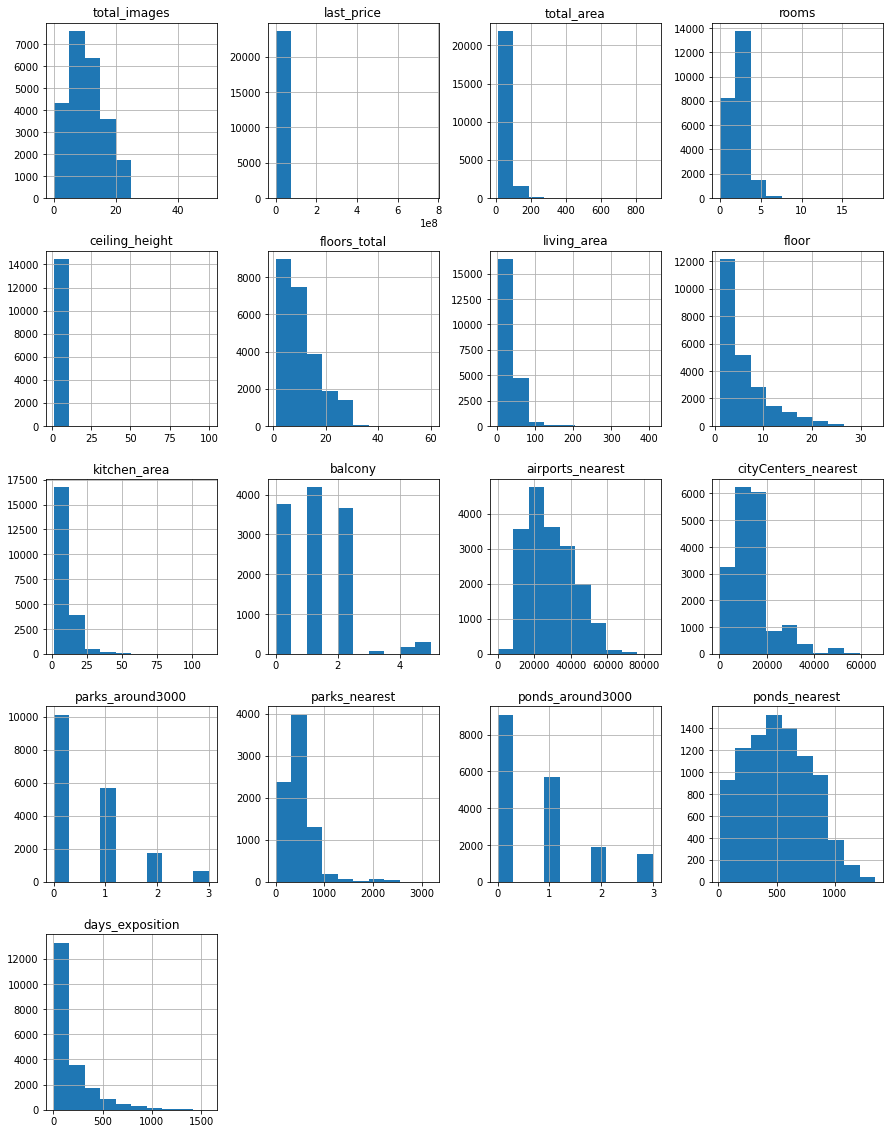

In [ ]:
data.hist(figsize=(15, 20))

Вывод:
Всего 22 столбца и 23699 строк записей. В 16 столбцах есть пропуски значений.Присутствует некорректное наименование столбцов. Присутствуют столбцы с некорректными типами данных. Распределение данных напоминает распределение Пуассона.

### Предобработка данных

Переименуем столбец cityCenters_nearest
Приведем в целочисленный тип данные столбцов last_price, balcony, parks_around3000, ponds_around3000, заменяем пропуски на 0.
Приведем к типу даты дату публикации
Выводим полученный результат по оставшимся пропущенным значениям

In [ ]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше всего пропусков в апартаментах, предположим, что пропущенные значения - это "нет", заменим их.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Малыми значениями можно пренебречь, удаляем строки с отсутствующей этажностью и локацией

In [ ]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int) #сразу приводим к целочисленному типу
data.dropna(subset=['locality_name'], inplace=True)

Заполним пропуски в жилой площади. Чаще всего между жилой площадью и общей существует прямая зависимость. Для этого возьмем среднее соотношение жилой площади к общей

In [ ]:
living_ratio_median = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_ratio_median * data['total_area'], inplace=True)

Аналогично заполним пропуски в площади кухни

In [ ]:
kitchen_ratio_median = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_ratio_median * data['total_area'], inplace=True)

Средняя высота потолка по нормам строительства 2,5 - 3 м. Посмотрим внимательнее на данные в нашем датафрейме

In [ ]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Данные выше подтвердили предположение. Но дополнительно посмотрим количество записей с выбивающимися значениями  

In [ ]:
data.query('ceiling_height <= 2')['ceiling_height'].count()

14

In [ ]:
data.query('ceiling_height >= 6')['ceiling_height'].count()

30

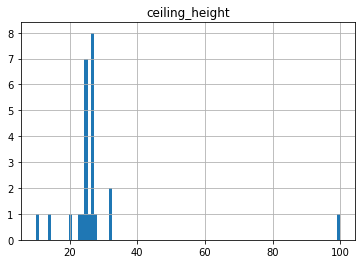

In [ ]:
data.hist('ceiling_height',bins=100, range=(10,100));

In [ ]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 30)]['ceiling_height']/10)
print (data.query('ceiling_height >= 6')['ceiling_height'].count())
data.drop(index=data.query('ceiling_height >= 6').index,inplace=True)
data.drop(index=data.query('ceiling_height <= 2').index,inplace=True)
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].describe()

13


count    23538.000000
mean         2.697100
std          0.219856
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

In [ ]:
#data.drop(index=data.query('ceiling_height >= 6').index,inplace=True)
#data.drop(index=data.query('ceiling_height <= 2').index,inplace=True)
#data['ceiling_height'].describe()

Выбивающихся значений немного, их сразу удаляем.
Заменяем все пропущенные значения ceiling_height на 2.65

In [ ]:
#data['ceiling_height'].fillna(2.65, inplace=True)

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5513
city_centers_nearest     5490
parks_around3000            0
parks_nearest           15517
ponds_around3000            0
ponds_nearest           14512
days_exposition          3165
dtype: int64

Проверим и устраним дубликаты.

In [ ]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Обнаружены неявные дубликаты. Приведем к общему названию "поселок", "поселок городского типа"

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')
data.duplicated().sum()

0

Устраняем редкие и выбивающиеся значения (аномалии) во всех столбцах.
смотрим общее описание датафрейма

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23538.000000,2.353800e+04,23538.000000,23538.000000,23538.000000,23538.000000,23538.000000,23538.000000,23538.000000,23538.000000,18025.000000,18048.000000,23538.000000,8021.000000,23538.000000,9026.000000,20373.000000
mean,9.879047,6.537344e+06,60.327871,2.070907,2.697100,10.676311,34.622425,5.878112,10.501110,0.593381,28799.081942,14193.607380,0.468731,490.555542,0.589812,518.425105,180.778285
std,5.679710,1.089182e+07,35.660869,1.078762,0.219856,6.593795,22.394663,4.872131,6.039918,0.959857,12635.724315,8614.816177,0.748183,341.689784,0.883796,277.991357,219.793294
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18557.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.648500e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.000000,13100.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.796750e+06,69.700000,3.000000,2.700000,16.000000,42.115385,8.000000,12.000000,1.000000,37277.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images - есть без изображений, максимально 50 шт. медиана - 10 шт. вполне реалистично.
last_price - посмотрим внимательнее с помощью гистограмм в районе максимальных и минимальных значений

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

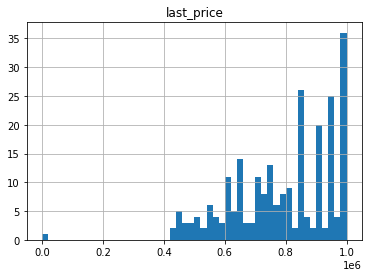

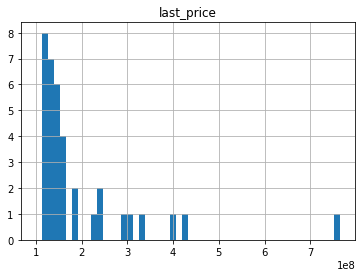

In [ ]:
data.hist('last_price', bins=50, range=(0,1e+06))
data.hist('last_price', bins=50, range=(1e+08,7.65e+08))

Удалим данные по квартирам меньше 400 тыс и больше 100 млн

In [ ]:
data.drop(index=data.query('last_price < 1e+05').index,inplace=True)
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

total_area - минимальное значение 12 выглядит правдоподобно. Посмотрим внимательнее с помощью гистограмм в районе максимальных значений

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

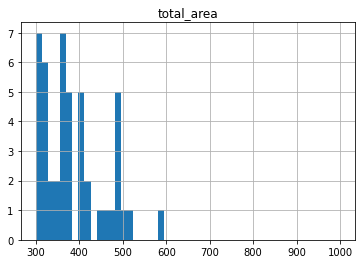

In [ ]:
data.hist('total_area', bins=50, range=(300,1000))

Больше 400 кв.м. значений немного, можно пренебречь

In [ ]:
data.drop(index=data.query('total_area > 400').index,inplace=True)

rooms - посмотрим внимательнее с помощью гистограмм в районе максимальных и минимальных значений

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

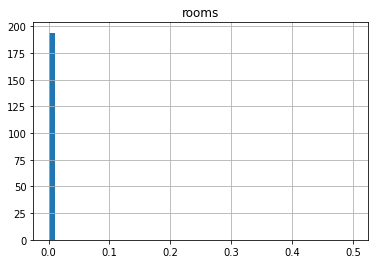

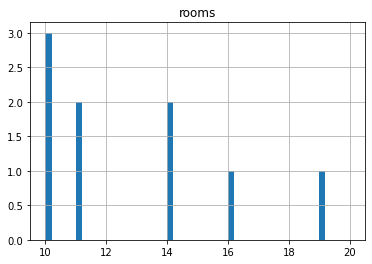

In [ ]:
data.hist('rooms', bins=50, range=(0,0.5))
data.hist('rooms', bins=50, range=(10,20))

Почти 200 квартир с количеством комнат 0 - не будем удалять значение, т.к. это могут быть студии, в которых продавец мог указать 1 или 0 комнат.
9 квартир, в которых 10 и более комнат - удалим данные значения

In [ ]:
data.drop(index=data.query('rooms >= 10').index,inplace=True)

ceiling_height данные в столбце выглядят правдоподобно, т.к. мы его уже очистили выше.

floors_total - минимальное значение 1 не является выбросом, а вот 60 уже похоже на выброс. Посмотрим внимательнее на значения больше 37, т.к. самым высоким жилым зданием Санкт-Петербурга является 37 этажная постройка.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

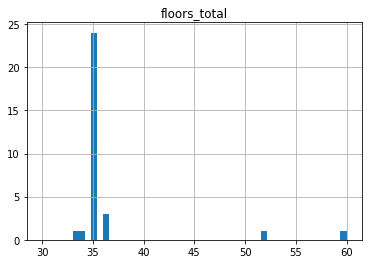

In [ ]:
data.hist('floors_total', bins=50, range=(30,60))

Удалим значения больше 37

In [ ]:
data.drop(index=data.query('floors_total > 37').index,inplace=True)

living_area - подозрительно минимальное значение. По установленным нормам для Санкт Петербурга - минимальная жилая площадь должна составлять не менее 9 м2.
Посмотрим значения менее 9, если их немного, удалим.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

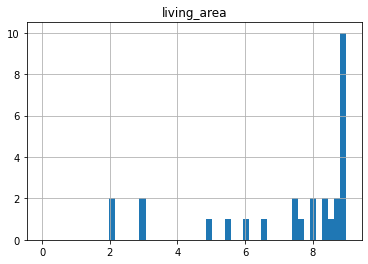

In [ ]:
data.hist('living_area', bins=50, range=(0,9))

In [ ]:
data.drop(index=data.query('living_area < 9').index,inplace=True)

Проверим что получается на текущий момент

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23457.000000,2.345700e+04,23457.000000,23457.000000,23457.000000,23457.000000,23457.000000,23457.000000,23457.000000,23457.000000,17949.000000,17970.000000,23457.000000,7966.000000,23457.000000,8973.000000,20304.000000
mean,9.870614,6.212427e+06,59.598053,2.060238,2.695670,10.679413,34.214635,5.876412,10.421194,0.594066,28806.503872,14224.532721,0.466257,490.874466,0.587117,519.382481,180.500197
std,5.676071,6.267373e+06,31.591790,1.041063,0.216031,6.581979,20.246131,4.869716,5.727822,0.960125,12649.413408,8608.874454,0.745769,342.376476,0.881256,277.895319,219.460662
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,9.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18539.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26766.000000,13123.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,732.000000,231.000000
max,50.000000,9.900000e+07,400.000000,9.000000,5.800000,36.000000,255.700000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Значения в столбцах kitchen_area, balcony, city_centers_nearest, parks_around3000, parks_nearest,	ponds_around3000, ponds_nearest выглядят правдоподобно.
Остается разобраться только с минимальным значением airports_nearest и максимальным значением days_exposition

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

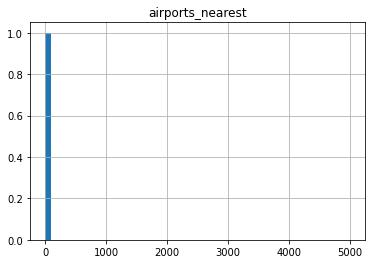

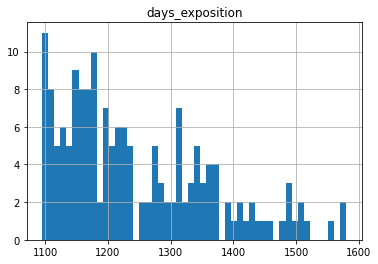

In [ ]:
data.hist('airports_nearest', bins=50, range=(0,5e+03)) #смотрим постройки ближе 5 км
data.hist('days_exposition', bins=50, range=(1095,1580)) #смотрим объявления старше 3 лет

Удаляем данные ближе 5 км к аэропорту и старше 3 лет размещения.

In [ ]:
data.drop(index=data.query('airports_nearest < 5e+03').index,inplace=True)
data.drop(index=data.query('days_exposition > 1095').index,inplace=True)

На данном этапе проведена следующая работа, в соответствии с чек-листом:
-заполнены пропущенные значения там, где это возможно
-изменены типы данных
-устранены неявные дубликаты в названиях населённых пунктов
-устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23293 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23293 non-null  int64         
 1   last_price            23293 non-null  int64         
 2   total_area            23293 non-null  float64       
 3   first_day_exposition  23293 non-null  datetime64[ns]
 4   rooms                 23293 non-null  int64         
 5   ceiling_height        23293 non-null  float64       
 6   floors_total          23293 non-null  int64         
 7   living_area           23293 non-null  float64       
 8   floor                 23293 non-null  int64         
 9   is_apartment          23293 non-null  bool          
 10  studio                23293 non-null  bool          
 11  open_plan             23293 non-null  bool          
 12  kitchen_area          23293 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-info">

От изначальных 23699 записей осталось 23293, а значит убрали 1,7% записей, что не критично

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в таблицу:
-цена одного квадратного метра
-день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
-месяц публикации объявления
-год публикации объявления

In [ ]:
data['cost_per_sqm'] = data['last_price'] / data['total_area']
data['day_of_week'] = data['first_day_exposition'].dt.day_of_week
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»).
Для этого создадим функцию

In [ ]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

Посчитаем и добавим в таблицу расстояние в км до центра города

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

На предварительном этапе мы начали изучение параметров по каждому столбцу, опишем их более детально, для этого построим гистограммы по исследуемым параметрам

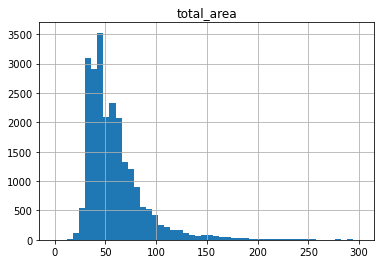

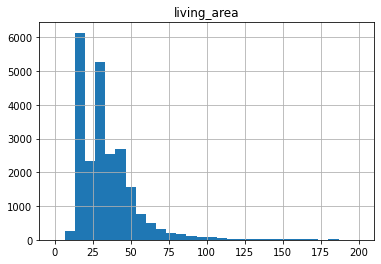

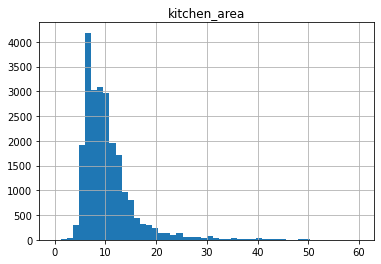

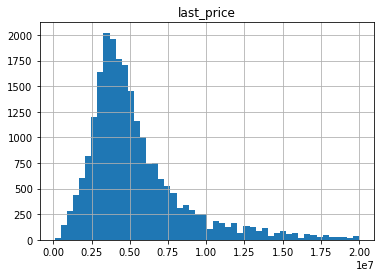

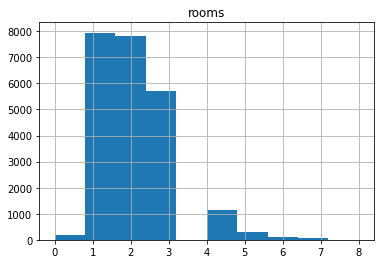

In [ ]:
data.hist('total_area', bins=50, range=(0,300));
data.hist('living_area', bins=30, range=(0,200));
data.hist('kitchen_area', bins=50, range=(0,60));
data.hist('last_price', bins=50, range=(1e+05,2e+07));
data.hist('rooms', bins=10, range=(0,8));

Общая площадь - распределение Пуассона. Выбросы очищены на предыдущем шаге. Основная масса квартир 25-50 м2 - это логично, т.к. является самой популярной категорией в продаже квартир (одно-двух комнатные). Квартир большой площади (более 100 значиетельно меньше.

Жилая площадь - аналогично общей площади, только тут наблюдаем два пика в связи с провалом в районе 23 м2

Площадь кухни - аналогично общей площади, это объяснимо, т.к. между этими двумя показателями обычно прямая зависимость.

Стоимость - распределение Пуассона. Выбросы очищены на предыдущем шаге. Основное скопление цен от 2.5 до 6 млн. после 10 млн предложений не много.

Кол-во комнат - как мы уже сталкивались на этапе предобработки данных есть показатель 0 с малым значением, который мы оставили, т.к. предположили, что это студии. Подтверждается предположение, которое мы делали изучая общую площадь одно-двух комнатные квартиры самая популярная категория.

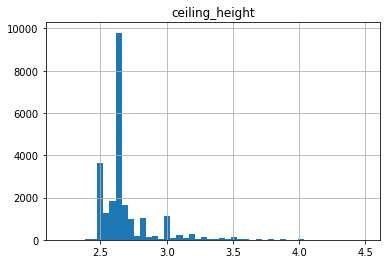

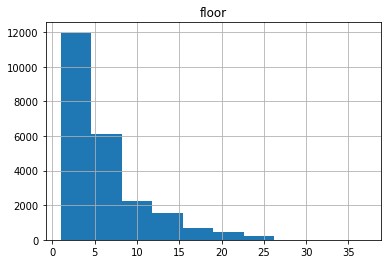

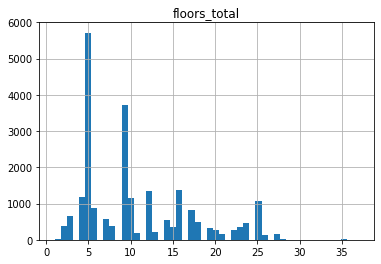

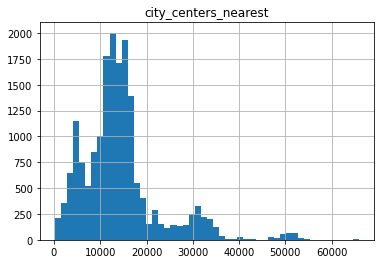

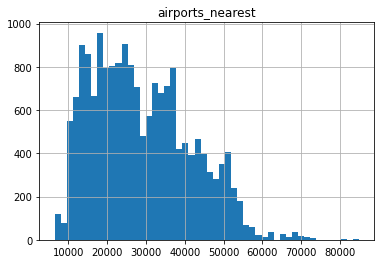

In [ ]:
data.hist('ceiling_height', bins=50, range=(2.2,4.5));
data.hist('floor', bins=10, range=(1,37));
data.hist('floors_total', bins=50, range=(1,37));
data.hist('city_centers_nearest', bins=50);
data.hist('airports_nearest', bins=50);

Высота потолков - данный параметр мы подробно описывали на этапе предобработки данных. На первый взгляд может показаться странным пиковое значение 2.65, но вспомним, что именно этим значением мы обоснованно заменили пропуски данных. Если учесть, и мы убедились, что наиболее массовая группа - это малогабаритные 1-2 комнатные квартиры, предположительно "Хрущевки" и "панельки", то средняя высота потолков в дамах такого типа 2.6-2.7 м.

Этаж - больше всего с 1 по 5 этаж, это подтверждает предположение выше о домах типа "Хрущевки" в 5 этажей. Это предположение еще было сделано, на этапе предобработки данных мы исследовали данные по жилому фонду Санкт-Петербурга, когда искали самый высокий жилой дом для очистки выбросов.

Общее кол-во этажей - все значения логичны из предыдущего пункта.

Расстояние до центра города - здесь несколько пиков 5 км и 10-15 км. До 5 км - считается историческим центром, там преобладает элитная недвижимость, которая продается в значительно меньшей степени. Начиная от 10-15 км -  это "спальные районы" в районе КАД с меньшей стомиостью, 30 - 50 км - пригород. Учитывая это распределение выглядит вполне закономерно.

Расстояние до аэропорта - основной разброс от 10 до 40 км. Это логично, если учесть, что Пулково на юге за городом, соответственно все квартиры на юге будут в районе 10-15 км. от аэропорта, все квартиры на севере города в районе 30-40 км.

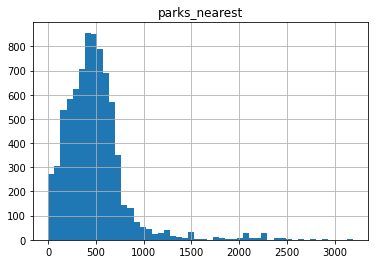

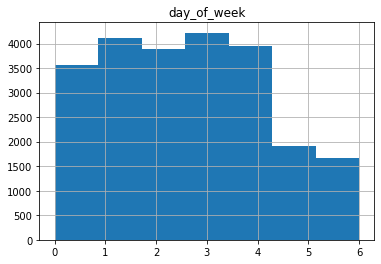

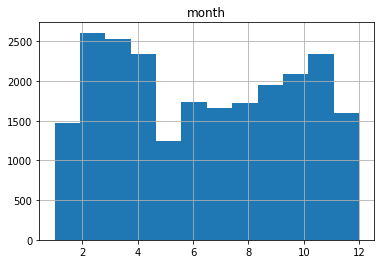

In [ ]:
data.hist('parks_nearest', bins=50);
data.hist('day_of_week', bins=7);
data.hist('month', bins=12);

Ближайшие парки - вполне логичное распределение 0-700 м основная масса - в Санкт Петербурге очень много парков в шаговой доступности.

День недели размещения оьбъявления - на выходных размещений меньше, что логично.

Месяц размещения объявления - январь, май, декабрь - спад активности, что с учетом данных из предыдущей гистограммы подтверждает, что на выходных и праздниках пользователи менее активны.

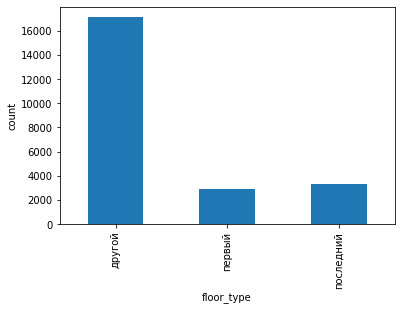

In [ ]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count');

Тип этажа - первый и последний этажи продаются примерно одинаково.

Выполним задание "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану

In [ ]:
data['days_exposition'].describe()

count    20140.000000
mean       171.872691
std        197.885269
min          1.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1095.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

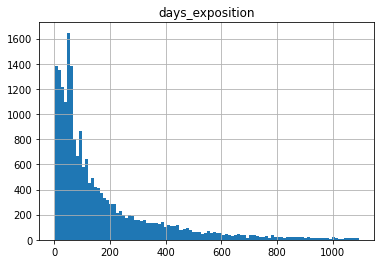

In [ ]:
data.hist('days_exposition', bins=100)

Среднее время продажи - 171 день
Медиана - 94 дня.
График имеет длинный хвост, посмотрим крупнее между квартилями.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

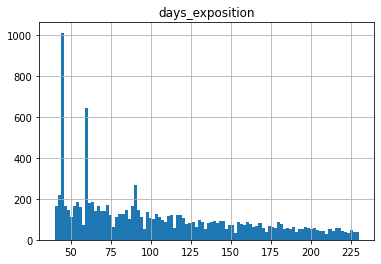

In [ ]:
data.hist('days_exposition', bins=100, range=(40,230))

Есть пики в районе 40 , 60 и 90 дней, но медиана в районе 94, т.е. можно утверждать, что в основном квартиры продаются до трех месяцев, но присутствуют и очень длинные продажи год и более.
(Тут можно было  дополнительно уточнить у заказчика есть ли на сайте автоматическое закрытие объявления в случае неактивности, или его отсутствие може давать искажение)

<div class="alert alert-block alert-info">

По ссылке для Москвы, Санкт-Петербурга и области срок размещения бесплатных объявлений 120 дней т.е. нет ограничения на 45, 60 и 90 дней, как для регионов, но судя по данным из графика эти ограничения были в 2015 году. Выбросы удалил, пересчитал, медиана сдвинулась с 94 на 98 дней, т.е. продажи до 98 дней считаются быстрыми.

In [ ]:
data.drop(index=data.query('days_exposition == 45').index,inplace=True)
data.drop(index=data.query('days_exposition == 60').index,inplace=True)
data.drop(index=data.query('days_exposition == 90').index,inplace=True)
data['days_exposition'].describe()

count    19604.000000
mean       174.931443
std        199.694063
min          1.000000
25%         43.000000
50%         98.000000
75%        231.000000
max       1095.000000
Name: days_exposition, dtype: float64

Выполоним задание:
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Посмотрим корреляцию для определения влияния параметров на цену.

In [ ]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'balcony', 'ceiling_height', 'city_centers_nearest',  'is_apartment', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor,balcony,ceiling_height,city_centers_nearest,is_apartment,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
last_price,1.000000,0.764985,0.683443,0.612694,0.467290,0.037592,0.013735,0.390212,-0.303205,0.035166,0.283140,-0.014601,0.283797,-0.119738
total_area,0.764985,1.000000,0.941205,0.638706,0.780480,-0.030819,0.015480,0.397502,-0.240385,0.024352,0.208456,-0.019524,0.205087,-0.092686
living_area,0.683443,0.941205,1.000000,0.457624,0.848034,-0.098883,-0.009293,0.372412,-0.235113,0.023593,0.213512,-0.049993,0.185006,-0.077412
kitchen_area,0.612694,0.638706,0.457624,1.000000,0.302605,0.112195,0.046382,0.329939,-0.192532,0.043822,0.127388,0.025845,0.172845,-0.091354
rooms,0.467290,0.780480,0.848034,0.302605,1.000000,-0.157984,-0.014493,0.234274,-0.182955,0.001468,0.156086,-0.054523,0.118136,-0.054001
floor,0.037592,-0.030819,-0.098883,0.112195,-0.157984,1.000000,0.175240,-0.042496,0.008568,-0.012909,-0.101235,0.072208,-0.025538,0.028311
balcony,0.013735,0.015480,-0.009293,0.046382,-0.014493,0.175240,1.000000,-0.043876,0.065824,0.029073,-0.070127,0.035463,-0.037421,0.016724
ceiling_height,0.390212,0.397502,0.372412,0.329939,0.234274,-0.042496,-0.043876,1.000000,-0.294872,0.065810,0.243713,-0.055829,0.216246,-0.109093
city_centers_nearest,-0.303205,-0.240385,-0.235113,-0.192532,-0.182955,0.008568,0.065824,-0.294872,1.000000,0.010054,-0.159603,-0.037514,-0.072890,0.029630
is_apartment,0.035166,0.024352,0.023593,0.043822,0.001468,-0.012909,0.029073,0.065810,0.010054,1.000000,0.016023,-0.029343,0.021069,0.003740


Общая и жилая площадь сильнее всего влияют на стоимость квартиры.
Построим графики зависимости цены от параметров.

<AxesSubplot:xlabel='last_price', ylabel='year'>

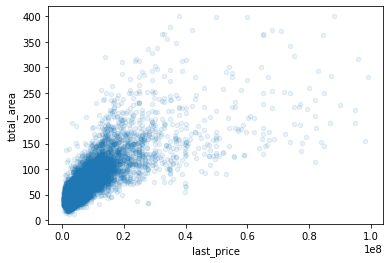

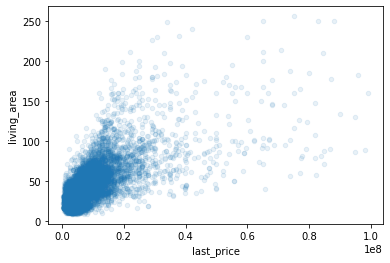

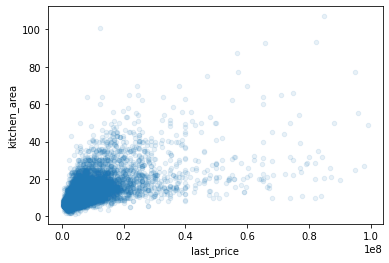

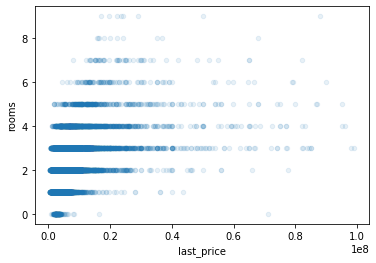

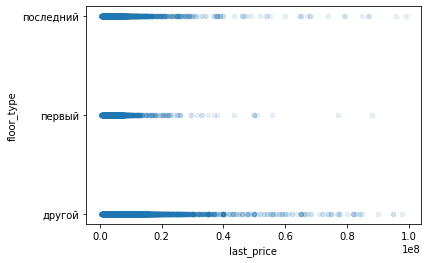

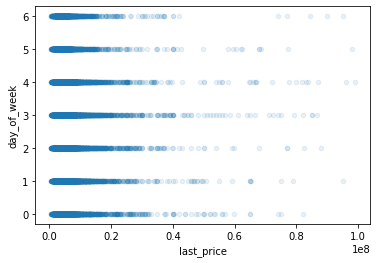

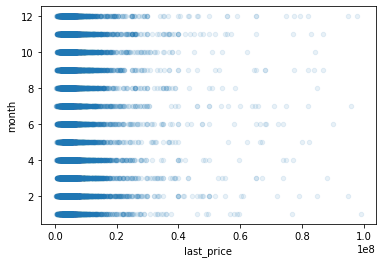

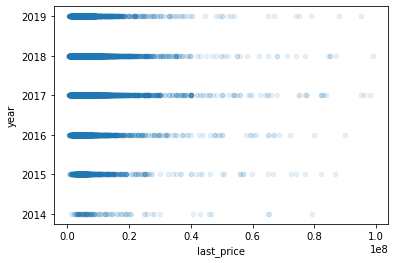

In [ ]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='month', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='year', kind='scatter', alpha=0.1)

Выполним задание: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
top_city = data['locality_name'].value_counts().head(10)
top_city_sqm = data.query('locality_name in (@top_city.index)').pivot_table(values='cost_per_sqm', index='locality_name').astype(int).sort_values('cost_per_sqm', ascending=False)
top_city_sqm

,cost_per_sqm
locality_name,
санкт-петербург,113635
пушкин,103282
деревня кудрово,92402
поселок парголово,90149
поселок мурино,85566
поселок шушары,78458
колпино,75467
гатчина,68651
всеволожск,68534


Самая высокая стоимость квадратного метра из топ -10 городов по кол-ву объявлений в Санкт-Петербурге и Пушкине, самая низкая в данной категории стоимость в Выборге.

Вычислим среднюю цену каждого километра от центра города в г. Санкт-Петербург.

<AxesSubplot:xlabel='city_centers_nearest_km'>

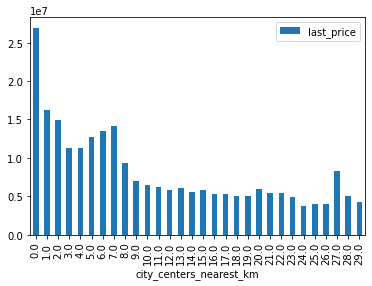

In [ ]:
data[data['locality_name']=='санкт-петербург'].pivot_table(
    index='city_centers_nearest_km',
    values='last_price',
    aggfunc='mean').plot(kind='bar')

Наибольшая стоимость квартир в центре, далее идет зона высокой цены на удалении 1-7 км, после чего цена равномерно снижается с удалением от центра. Небольшой пик на 27 км соответствует расстоянию до г. Пушкин.
Этот факт указывает, что некоторые пользователи не указывают фактическое наименование населенного пункта.

### Общий вывод
Проанализировали данные по объявлениям о продаже квартир из чего можно сделать следующие основные общие выводы:
 - Наибольшее количество объявлений о продаже квартир непосредственно в Санкт-Петербурге, там же и самая высокая стоимость квадратного метра.
 - Стоимость квартир напрямую зависит от площади.
 - Стоимость квадратного метра снижается при удалении от центра города.
 - Наибольшим спросом пользуются 1 -2 комнатные квартиры с площадью 30 - 50 м2 в невысоких застройках 5 -9 этажей.
 - Наименьшая активность продавцов зафиксирована в выходные и праздничные дни.
 - В среднем объявления закрываются за 3 месяца.



- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод